# 0. Importing the Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import ast

# 1. Downloading the Datasets

In [2]:
product_catalog = pd.read_csv("original_data/product_catalog.csv")
product_category = pd.read_csv("original_data/product_category_map.csv")
transactions = pd.read_csv("original_data/transactions.csv")
test = pd.read_csv("original_data/test.csv")

## 1a. Analyzing & Preprocessing the Dataset

Investigating the entities, dtypes, numeric information etc.

### <center> - Product Catalog DataFrame - </center>

In [3]:
product_catalog.head()

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


In [4]:
product_catalog.describe()

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5
count,32776.000000,32776.000000,32776.000000,32776.000000,32776.000000,32776.000000,32776.000000
mean,16387.500000,702.776574,6.451062,0.817946,440.280388,0.804735,74.689285
std,9461.760548,432.774074,2.744884,0.778284,132.566994,1.354669,57.621143
min,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,8193.750000,322.000000,4.000000,0.000000,453.000000,0.000000,17.000000
50%,16387.500000,648.000000,6.000000,1.000000,491.000000,0.000000,66.000000
75%,24581.250000,1073.000000,10.000000,1.000000,509.000000,3.000000,126.000000
max,32775.000000,1513.000000,10.000000,3.000000,538.000000,4.000000,190.000000


In [5]:
product_catalog.isna().sum()

product_id            0
manufacturer_id       0
attribute_1           0
attribute_2           0
attribute_3           0
attribute_4           0
attribute_5           0
categories         6788
dtype: int64

In [6]:
product_catalog.shape

(32776, 8)

In [7]:
product_catalog.dtypes

product_id          int64
manufacturer_id     int64
attribute_1         int64
attribute_2         int64
attribute_3         int64
attribute_4         int64
attribute_5         int64
categories         object
dtype: object

In [8]:
product_catalog["categories"].nunique()

12191

In [9]:
product_catalog["categories"] = product_catalog['categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() != '' else [])

In [10]:
unique_categories = list()
for row in product_catalog["categories"]:
    for entity in row:
        if entity not in unique_categories:
            unique_categories.append(entity)

len(unique_categories)

3360

### <center> - Product Category - </center>

In [13]:
product_category.head()

,category_id,parent_category_id
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623


In [14]:
product_category.describe()

,category_id,parent_category_id
count,4332.000000,4332.000000
mean,2147.165512,2204.845568
std,1241.039814,1222.376330
min,0.000000,8.000000
25%,1069.750000,1143.750000
50%,2146.500000,2284.000000
75%,3221.250000,3329.000000
max,4299.000000,3898.000000


In [15]:
product_category.isna().sum()

category_id           0
parent_category_id    0
dtype: int64

In [16]:
product_category.dtypes

category_id           int64
parent_category_id    int64
dtype: object

In [17]:
product_catalog

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,[]
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]
...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,..."
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]"
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]"
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]"


### <center> - Transactions - </center>

In [18]:
transactions.head()

,customer_id,product_id,purchase_date,quantity
0,38769,3477,2020-06-01,1
1,42535,30474,2020-06-01,1
2,42535,15833,2020-06-01,1
3,42535,20131,2020-06-01,1
4,42535,4325,2020-06-01,1


In [19]:
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])

In [20]:
transactions.head()

,customer_id,product_id,purchase_date,quantity
0,38769,3477,2020-06-01,1
1,42535,30474,2020-06-01,1
2,42535,15833,2020-06-01,1
3,42535,20131,2020-06-01,1
4,42535,4325,2020-06-01,1


In [21]:
transactions.describe()

,customer_id,product_id,purchase_date,quantity
count,1.071538e+06,1.071538e+06,1071538,1.071538e+06
mean,2.307968e+04,1.652196e+04,2020-10-05 06:54:07.242748672,1.399758e+00
min,0.000000e+00,0.000000e+00,2020-06-01 00:00:00,1.000000e+00
25%,1.152400e+04,8.350000e+03,2020-08-03 00:00:00,1.000000e+00
50%,2.310300e+04,1.696000e+04,2020-10-07 00:00:00,1.000000e+00
75%,3.465500e+04,2.457900e+04,2020-12-08 00:00:00,1.000000e+00
max,4.613700e+04,3.277500e+04,2021-01-31 00:00:00,1.000000e+02
std,1.331930e+04,9.451299e+03,NaN,1.479233e+00


In [22]:
transactions.isna().sum()

customer_id      0
product_id       0
purchase_date    0
quantity         0
dtype: int64

In [23]:
transactions.dtypes

customer_id               int64
product_id                int64
purchase_date    datetime64[ns]
quantity                  int64
dtype: object

In [24]:
# Sort by customer_id, product_id, and purchase_date
transactions = transactions.sort_values(by=['customer_id', 'product_id', 'purchase_date'])

In [25]:
transactions.head()

,customer_id,product_id,purchase_date,quantity
390966,0,1505,2020-09-01,1
819667,0,6446,2020-12-11,1
978365,0,6446,2021-01-15,1
709719,0,9325,2020-11-20,1
268197,0,12468,2020-08-03,1


In [26]:
transactions['next_purchase_date'] = transactions.groupby(['customer_id', 'product_id'])['purchase_date'].shift(-1)
transactions.head()

,customer_id,product_id,purchase_date,quantity,next_purchase_date
390966,0,1505,2020-09-01,1,NaT
819667,0,6446,2020-12-11,1,2021-01-15
978365,0,6446,2021-01-15,1,NaT
709719,0,9325,2020-11-20,1,NaT
268197,0,12468,2020-08-03,1,NaT


In [27]:
transactions['re_purchased_week'] = (1+(transactions['next_purchase_date'] - transactions['purchase_date']).dt.days / 7).fillna(0).astype(int)
transactions.head()

,customer_id,product_id,purchase_date,quantity,next_purchase_date,re_purchased_week
390966,0,1505,2020-09-01,1,NaT,0
819667,0,6446,2020-12-11,1,2021-01-15,6
978365,0,6446,2021-01-15,1,NaT,0
709719,0,9325,2020-11-20,1,NaT,0
268197,0,12468,2020-08-03,1,NaT,0


In [28]:
new_df = transactions.drop(columns=['purchase_date', 'next_purchase_date'])
new_df.head()

,customer_id,product_id,quantity,re_purchased_week
390966,0,1505,1,0
819667,0,6446,1,6
978365,0,6446,1,0
709719,0,9325,1,0
268197,0,12468,1,0


In [29]:
new_df[new_df["quantity"] == 1].re_purchased_week.unique()

array([ 0,  6, 19, 10,  4,  7,  3, 13, 18, 17,  9,  8, 11, 30, 27,  5, 12,
       23, 29, 16, 21, 15, 22, 24, 20,  2, 32,  1, 26, 25, 14, 31, 28, 33,
       35, 34])

In [30]:
# Counting the occurrences of each re_purchased_week value
counts = new_df['re_purchased_week'].value_counts()

# Creating a new DataFrame to include weeks from 0 to 4
re_purchased_df = pd.DataFrame({'re_purchased_week': range(5), 'count': 0})
re_purchased_df.set_index('re_purchased_week', inplace=True)

# Updating the counts for weeks that exist in the data
for week, count in counts.items():
    if week in re_purchased_df.index:
        re_purchased_df.at[week, 'count'] = count

# Calculating the percentages
total_counts = re_purchased_df['count'].sum()
re_purchased_df['percentage'] = (re_purchased_df['count'] / total_counts * 100).round(2)

# Resetting index to make it more readable
final_df = re_purchased_df.reset_index()
final_df


,re_purchased_week,count,percentage
0,0,896426,97.14
1,1,3519,0.38
2,2,4974,0.54
3,3,7641,0.83
4,4,10279,1.11


In [31]:
final_df.describe()

,re_purchased_week,count,percentage
count,5.000000,5.000000,5.000000
mean,2.000000,184567.800000,20.000000
std,1.581139,397949.235535,43.123476
min,0.000000,3519.000000,0.380000
25%,1.000000,4974.000000,0.540000
50%,2.000000,7641.000000,0.830000
75%,3.000000,10279.000000,1.110000
max,4.000000,896426.000000,97.140000


#### PCA

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# I am not sure if these are the "most optimal" measures. We need to do experiment on that. (GBD)
customer_features = new_df.groupby('customer_id').agg({
    'product_id': 'nunique',
    'quantity': 'mean',         # Average of the purchased quantity
    're_purchased_week': 'mean' # Average repurchase interval
}).reset_index()

# Normalizing the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features.iloc[:, 1:])

# Determining optimal k using Silhouette Score
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(normalized_features)
    sil_scores.append(silhouette_score(normalized_features, labels))

optimal_k = sil_scores.index(max(sil_scores)) + 2

# Final clustering with optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(normalized_features)

# Saving results
customer_features.to_csv('clustered_customers.csv', index=False)


In [30]:
customer_features.nunique()

customer_id          46138
product_id             100
quantity              2218
re_purchased_week     4747
Cluster                  5
dtype: int64

In [31]:
max(sil_scores)

np.float64(0.3875933074095938)

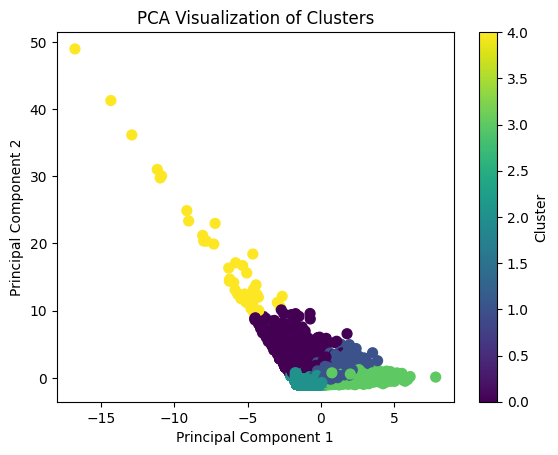

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features)

# Visalizing the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=customer_features['Cluster'], cmap='viridis', s=50)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
